<a href="https://colab.research.google.com/github/AnatoliyZhuk/Knowledge/blob/main/Math_Stat_HSE/Math_Stat_HSE1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1> Доверительные интервалы для средних в Python <h1>

In [16]:
# Импортируем библиотеки
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
# Стиль для графиков
plt.style.use('ggplot')
sns.set()

In [13]:
# задаем распределение - нормальная непрерывная случайная величина (0-математическе ожидание; 1-дисперсия)
norm_rv = stats.norm(loc=0, scale=1)
# квантиль от нормального распределения 
print(f'Квантиль уровня 0.025 = {norm_rv.ppf(0.025) :.2f}') 

Квантиль уровня 0.025 = -1.96


(-1.959963984540054, 1.959963984540054)

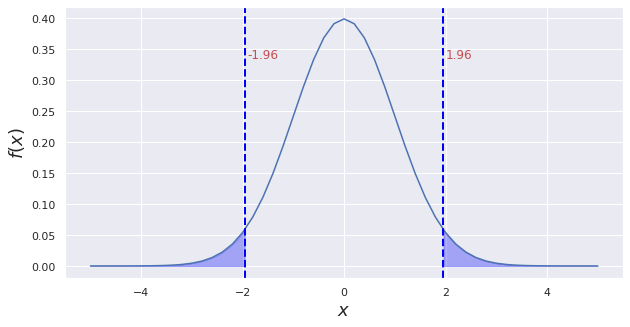

In [25]:
def norm_conf_int (alpha, mean_hat=0, std_hat=1, margin=5):

  plt.figure(figsize=(10,5))
  xs = np.linspace(mean_hat - margin, mean_hat + margin, 51) # 11 значений от mean_hat - margin до mean_hat + margin
  pdf = stats.norm(mean_hat, std_hat).pdf(xs) # pdf - значение плотности распределения для каждого значения из xs

  plt.plot(xs, pdf)
  plt.ylabel('$f(x)$', fontsize=18)
  plt.xlabel('$x$', fontsize=18)
  # Блок синих пунктирных линий 
  left, right = stats.norm.interval(1 - alpha, loc=mean_hat, scale=std_hat)
  for i in [left, right]:
    y_max = plt.ylim()[1]
    plt.axvline(i, color='blue', linestyle='dashed', lw=2)
    # Блок красных цифр
    if i == left:
      xq = np.linspace(mean_hat - margin, left)
    else:
      xq = np.linspace(right, mean_hat + margin)
    text_margin = 0.05
    plt.text(i + text_margin, 0.8 * y_max, round(i, 2), color='r')
    # Блок закраски синей границы
    yq = stats.norm(mean_hat, std_hat).pdf(xq)
    plt.fill_between(xq, 0, yq, color='blue', alpha=0.3)

  return left, right
alpha = 0.05
norm_conf_int(0.05)

Ульяна любит сериалы! Конечно же, Игра Престолов не обошла её стороной. Она смотрит её каждый день <br/> 
Пусть $X$ - число серий, которое Ульяна просмотрела за день <br/> 
Так как число серий - счётчик, можно предположить, что $X \sim Poiss(\lambda)$, где $\lambda$ - интенсивность просмотра <br/> 
Cлучайные величины счётчики можно (но не обязательно) моделировать с помощью распределения Пуассона <br/> 

Ульяне стало интересно с какой интенсивностью она смотрит сериалы, и теперь она хочет построить для $\lambda$ оценку методом моментов, а после доверительный интервал для неё <br/> 

$$
\hat \lambda \overset{asy}{\sim} N \left(\lambda, \frac{\hat \lambda}{n} \right).
$$

$$
\hat \lambda \pm z_{1 - \frac{\alpha}{2}} \cdot \sqrt{\frac{\hat \lambda}{n}}
$$

In [ ]:
norm_rv = stats.norm(loc=0, scale=1)
alpha = 0.05

In [ ]:
# Построим точечную оценку для лямбды
x = [5, 7, 8, 2, 3, 1, 2]
lam_hat = np.mean(x)
lam_se = np.sqrt(lam_hat/len(x))
# С помощью ЦПТ построим довеительный интервал
z_alpha = norm_rv.ppf(1 - (alpha/2)) # подсчитываем квантиль

lam_hat = np.mean(x)
lam_se = np.sqrt(lam_hat / len(x))
lam_left = lam_hat - z_alpha*lam_se
lam_right = lam_hat + z_alpha*lam_se

print(f"Доверительный интервал [{lam_left:.3};{lam_right:.3}]\n\
Ширина доверительного интервала {lam_right - lam_left:.3}")

Доверительный интервал [2.52;5.48]
Ширина доверительного интервала 2.96


In [2]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
# Стиль для графиков
plt.style.use('ggplot')
sns.set()
norm_rv = stats.norm(loc=0, scale=1)
alpha = 0.05
# Построим точечную оценку для лямбды

lam_hat = (250 / 400) 
lam_2 = (60 / 100)
lam_se = np.sqrt((lam_2 * (1-lam_2) / 100))
# С помощью ЦПТ построим довеительный интервал
z_alpha = norm_rv.ppf(1 - (alpha/2)) # подсчитываем квантиль

lam_left = lam_2 - z_alpha*lam_se
lam_right = lam_2 + z_alpha*lam_se

print(f"Доверительный интервал [{lam_left:.3};{lam_right:.3}]\n\
Ширина доверительного интервала {lam_right - lam_left:.3}")

Доверительный интервал [0.504;0.696]
Ширина доверительного интервала 0.192


Сущствует специальная функция **stats.norm.interval**, чтобы оценить доверительный интервал <br/>

In [ ]:
stats.norm.interval(0.95, loc=lam_hat, scale=lam_se)

(2.518406490932507, 5.481593509067493)

Можно построить этот же доверительный интервал с помощью функции, которую мы создали в самом начале <br/>

(2.518406490932507, 5.481593509067493)

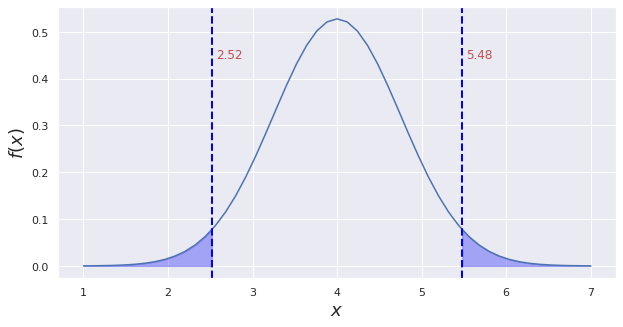

In [ ]:
# margin отвечает за увеличение графика по оси X
norm_conf_int(0.05, mean_hat=lam_hat, std_hat=lam_se, margin=3)

<h1>Продуктовые метрики<h1>

In [ ]:
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [ ]:
visits = pd.read_csv('https://raw.githubusercontent.com/AnatoliyZhuk/Knowledge/main/Math_Stat_HSE/marketing_log.csv', sep='\t')
visits['date'] = pd.to_datetime(visits['date'], format='%Y-%m-%d')
visits.sort_values('date', inplace=True) # inplace=True - преобразования применяются к исходной таблице
visits.reset_index(drop=True, inplace=True) # drop=True - перепутанные значения удаляются из таблицы

**date** - дата транзакции <br/>
**fullVisitorId** - уникальный номер <br/>
**browser** - браузер с которого осуществлялся вход <br/>
**deviceCategory** - устройство, с помощью которого осуществлялся вход <br/>
**transactionRevenue** - сумма транзакции (если NaN - пользователь ничего не купил)<br/>

In [ ]:
visits.head(3)

,date,fullVisitorId,browser,deviceCategory,transactionRevenue
0,2016-08-05,377595677869445136,Chrome,desktop,NaN
1,2016-08-05,7669007915434203149,Chrome,desktop,NaN
2,2016-08-05,8513048163701118333,Chrome,desktop,NaN


In [ ]:
# количество пользователей каждый день
day = visits.groupby('date').aggregate({'fullVisitorId' : 'nunique'})

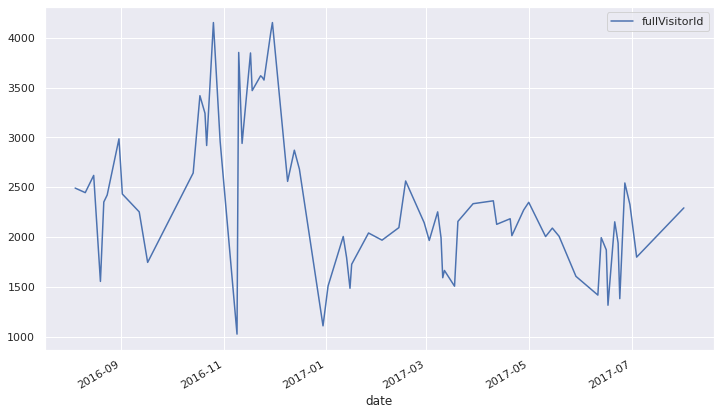

In [ ]:
# динамика пользователей
sns.set()
day.sort_index().plot(figsize=(12,7))
None